### __Importing Libraries__

In [73]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import Word
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
from autocorrect import Speller
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

### __Data Loading__

In [74]:
df = pd.read_csv('../../data/Tweets.csv')
data = df[['text','airline_sentiment']]

In [75]:
data["text"].head(20)

0                   @VirginAmerica What @dhepburn said.
1     @VirginAmerica plus you've added commercials t...
2     @VirginAmerica I didn't today... Must mean I n...
3     @VirginAmerica it's really aggressive to blast...
4     @VirginAmerica and it's a really big bad thing...
5     @VirginAmerica seriously would pay $30 a fligh...
6     @VirginAmerica yes, nearly every time I fly VX...
7     @VirginAmerica Really missed a prime opportuni...
8       @virginamerica Well, I didn't…but NOW I DO! :-D
9     @VirginAmerica it was amazing, and arrived an ...
10    @VirginAmerica did you know that suicide is th...
11    @VirginAmerica I &lt;3 pretty graphics. so muc...
12    @VirginAmerica This is such a great deal! Alre...
13    @VirginAmerica @virginmedia I'm flying your #f...
14                               @VirginAmerica Thanks!
15        @VirginAmerica SFO-PDX schedule is still MIA.
16    @VirginAmerica So excited for my first cross c...
17    @VirginAmerica  I flew from NYC to SFO las

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


### __Data Cleaning__
1. Missing Values
2. Data Types
3. Duplicates

In [77]:
# checking for missing values
data.isnull().sum()

text                 0
airline_sentiment    0
dtype: int64

In [78]:
# checking the description of the data
data.describe()

,text,airline_sentiment
count,14640,14640
unique,14427,3
top,@united thanks,negative
freq,6,9178


In [79]:
# ensuring that the "text" and "airline_sentiment" columns has unique datatypes
num_text_types = data['text'].apply(type).nunique()
num_sentiment_types = data['airline_sentiment'].apply(type).nunique()
print(f"n of datatypes in 'text': {num_text_types}")
print(f"n of datatypes in 'airline_sentiment': {num_sentiment_types}")

n of datatypes in 'text': 1
n of datatypes in 'airline_sentiment': 1


In [80]:
# gettting the row value of the duplicated rows in text column
duplicate_count = data['text'].duplicated().sum()
print(f"n of duplicate rows in 'text': {duplicate_count}")

n of duplicate rows in 'text': 213


In [81]:
# dropping the duplicated rows in "text" column
data = data.drop_duplicates(subset=['text'])

In [82]:
# checking the description of the data after dropping the duplicated rows
data.describe()

,text,airline_sentiment
count,14427,14427
unique,14427,3
top,@AmericanAir we have 8 ppl so we need 2 know h...,negative
freq,1,9080


### __Text Preprocessing__
1. Lowercasing
2. URLs Handling
3. User Mentions Handling
4. English Abbreviations & Slang Handling
5. English Contractions Handling
6. Punctuation & Special Characters Handling
7. Stopwords Handling
8. Emoji/Emoticon Handling via regex
9. Spell Checking
10. Lemmatization
11. Tokenization

In [83]:
# converting all text to lowercase
data['text'] = data['text'].str.lower()
data["text"].head(20)

0                   @virginamerica what @dhepburn said.
1     @virginamerica plus you've added commercials t...
2     @virginamerica i didn't today... must mean i n...
3     @virginamerica it's really aggressive to blast...
4     @virginamerica and it's a really big bad thing...
5     @virginamerica seriously would pay $30 a fligh...
6     @virginamerica yes, nearly every time i fly vx...
7     @virginamerica really missed a prime opportuni...
8       @virginamerica well, i didn't…but now i do! :-d
9     @virginamerica it was amazing, and arrived an ...
10    @virginamerica did you know that suicide is th...
11    @virginamerica i &lt;3 pretty graphics. so muc...
12    @virginamerica this is such a great deal! alre...
13    @virginamerica @virginmedia i'm flying your #f...
14                               @virginamerica thanks!
15        @virginamerica sfo-pdx schedule is still mia.
16    @virginamerica so excited for my first cross c...
17    @virginamerica  i flew from nyc to sfo las

In [84]:
# removing URLs
data['text'] = data['text'].apply(lambda x: re.sub(r'http\S+', '', x))
data["text"].head(20)

0                   @virginamerica what @dhepburn said.
1     @virginamerica plus you've added commercials t...
2     @virginamerica i didn't today... must mean i n...
3     @virginamerica it's really aggressive to blast...
4     @virginamerica and it's a really big bad thing...
5     @virginamerica seriously would pay $30 a fligh...
6     @virginamerica yes, nearly every time i fly vx...
7     @virginamerica really missed a prime opportuni...
8       @virginamerica well, i didn't…but now i do! :-d
9     @virginamerica it was amazing, and arrived an ...
10    @virginamerica did you know that suicide is th...
11    @virginamerica i &lt;3 pretty graphics. so muc...
12    @virginamerica this is such a great deal! alre...
13    @virginamerica @virginmedia i'm flying your #f...
14                               @virginamerica thanks!
15        @virginamerica sfo-pdx schedule is still mia.
16    @virginamerica so excited for my first cross c...
17    @virginamerica  i flew from nyc to sfo las

In [85]:
# removing user mentions
data['text'] = data['text'].apply(lambda x: re.sub(r'@\S+', '', x))
data["text"].head(20)

0                                           what  said.
1      plus you've added commercials to the experien...
2      i didn't today... must mean i need to take an...
3      it's really aggressive to blast obnoxious "en...
4              and it's a really big bad thing about it
5      seriously would pay $30 a flight for seats th...
6      yes, nearly every time i fly vx this “ear wor...
7      really missed a prime opportunity for men wit...
8                      well, i didn't…but now i do! :-d
9      it was amazing, and arrived an hour early. yo...
10     did you know that suicide is the second leadi...
11     i &lt;3 pretty graphics. so much better than ...
12     this is such a great deal! already thinking a...
13      i'm flying your #fabulous #seductive skies a...
14                                              thanks!
15                       sfo-pdx schedule is still mia.
16     so excited for my first cross country flight ...
17      i flew from nyc to sfo last week and cou

In [86]:
# changing abbreviations and slang to their standard forms
abbreviation_dict = {
    "u": "you",
    'u': 'you',
    "bked": "booked",
    "thx": "thanks",
    "plz": "please",
    "sfo": "san francisco airport",
    "lax": "los angeles airport",
    "nyc": "new york city",
    "bos": "boston",
    "las": "las vegas",
    "dal": "dallas",
    "dca": "washington, d.c.",
    "lg": "likely good"
}

def text_std(text):
    words = text.split()
    new_words = []
    for word in words:
        if word in abbreviation_dict:
            word = abbreviation_dict[word]
        new_words.append(word)
    return " ".join(new_words)

data['text'] = data['text'].apply(text_std)
data["text"].head(20)

0                                            what said.
1     plus you've added commercials to the experienc...
2     i didn't today... must mean i need to take ano...
3     it's really aggressive to blast obnoxious "ent...
4              and it's a really big bad thing about it
5     seriously would pay $30 a flight for seats tha...
6     yes, nearly every time i fly vx this “ear worm...
7     really missed a prime opportunity for men with...
8                      well, i didn't…but now i do! :-d
9     it was amazing, and arrived an hour early. you...
10    did you know that suicide is the second leadin...
11    i &lt;3 pretty graphics. so much better than m...
12    this is such a great deal! already thinking ab...
13    i'm flying your #fabulous #seductive skies aga...
14                                              thanks!
15                       sfo-pdx schedule is still mia.
16    so excited for my first cross country flight l...
17    i flew from new york city to san francisco

In [87]:
# handling english contractions
english_contractions_dict = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
    "could've": "could have", "couldn't": "could not", "couldn't've": "could not have",
    "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
    "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'll": "he will",
    "he's": "he is", "how'd": "how did", "how'll": "how will", "how's": "how is",
    "i'd": "i would", "i'll": "i will", "i'm": "i am", "i've": "i have", "isn't": "is not",
    "it'd": "it would", "it'll": "it will", "it's": "it is", "let's": "let us",
    "ma'am": "madam", "might've": "might have", "mightn't": "might not", "must've": "must have",
    "mustn't": "must not", "needn't": "need not", "shan't": "shall not", "she'd": "she would",
    "she'll": "she will", "she's": "she is", "should've": "should have", "shouldn't": "should not",
    "that'd": "that would", "that's": "that is", "there's": "there is", "they'd": "they would",
    "they'll": "they will", "they're": "they are", "they've": "they have", "wasn't": "was not",
    "we'd": "we would", "we're": "we are", "we've": "we have", "weren't": "were not",
    "what'll": "what will", "what're": "what are", "what's": "what is", "what've": "what have",
    "where's": "where is", "who's": "who is", "who've": "who have", "won't": "will not",
    "would've": "would have", "wouldn't": "would not", "you'd": "you would", "you'll": "you will",
    "you're": "you are", "you've": "you have"
}

def text_std(text):
    words = text.split()
    new_words = []
    for word in words:
        if word in english_contractions_dict:
            word = english_contractions_dict[word]
        new_words.append(word)
    return " ".join(new_words)

data['text'] = data['text'].apply(text_std)
data["text"].head(20)

0                                            what said.
1     plus you have added commercials to the experie...
2     i did not today... must mean i need to take an...
3     it is really aggressive to blast obnoxious "en...
4             and it is a really big bad thing about it
5     seriously would pay $30 a flight for seats tha...
6     yes, nearly every time i fly vx this “ear worm...
7     really missed a prime opportunity for men with...
8                      well, i didn't…but now i do! :-d
9     it was amazing, and arrived an hour early. you...
10    did you know that suicide is the second leadin...
11    i &lt;3 pretty graphics. so much better than m...
12    this is such a great deal! already thinking ab...
13    i am flying your #fabulous #seductive skies ag...
14                                              thanks!
15                       sfo-pdx schedule is still mia.
16    so excited for my first cross country flight l...
17    i flew from new york city to san francisco

In [ ]:
# dealing with emojis
def convert_emojis(text):
    for emot in UNICODE_EMOJI: # like 😊
        if emot in text:
            text = text.replace(
                emot,
                UNICODE_EMOJI[emot]
                    .replace(":", "")
                    .replace(",", "")
                    .replace("_", " ")
                ).lower()
            
    for emo in EMOTICONS_EMO: # like :‑)
        if emo in text:
            text = text.replace(
                emo,
                EMOTICONS_EMO[emo]
                    .replace(":", "")
                    .replace(",", "")
                    .replace("_", " ")
                ).lower()
    return text

data['text'] = data['text'].apply(convert_emojis)
data["text"].head(20)

:)
❤
☺
👍
😡
😢
:(
✈
💜
✈
💺
👍
🍷
😊
👌
😍
:/
:(
💕
✈
🌞
😃
:(
:(
😭
😩
😎
🙉
😁
;)
:)
❤
❄
👏
;)
😂
💗
🍸
😒
:x
;)
:)
👎
:-)
✈
💗
👍
😀
😃
😄
😊
:-)
;)
😎
😘
🇺🇸
💗
👸
😁
:)
🇬🇧
🇺🇸
🌏
💗
🎀
😍
😥
🇬🇧
🇺🇸
🎀
:)
😉
✈
😱
😍
✨
:)
:(
✈
🎉
🇺🇸
💗
🎀
😃
👍
😁
:)
=/
:(
;)
:)
;)
🙌
💤
😡
😞
:)
♥
👋
😢
✌
🙏
:3
:)
:(
:)
❤
:)
🙌
💜
✈
❄
:(
😃
👿
😉
:)
😔
😭
:3
:(
😊
:)
=)
:)
:)
:3
:3
:)
🙌
:)
:3
🙅
😉
:3
✈
:3
:3
:(
👎
😡
:(
✈
👏
👍
🆖
:/
😢
💩
:3
;)
✔
🌴
:(
:/
:)
:)
:(
:)
:-)
:)
:)
✅
❌
:(
;)
:)
😡
:3
:-)
:)
:3
😊
:)
👏
👍
:3
:-)
👍
👏
🙏
:)
:3
😄
😡
:-)
😒
:3
:-)
:-)
🇬🇧
👠
😜
:(
👍
:3
👏
:3
😞
😡
:-(
:)
😊
🎉
:)
:3
😔
:)
:)
:/
:3
😊
:(
😻
:-(
:)
:3
:)
:)
:3
:)
😕
😊
:)
👎
:3
:)
:)
😭
👍
:(
👌
😉
:)
😢
:)
d:
:)
👎
:-(
:)
:)
😈
😡
:3
😊
👎
:)
;)
:)
😉
😤
😡
:3
❄
👏
😊
👍
❤
:)
😔
👌
👍
😂
:)
😊
😀
:)
:/
:)
😭
:)
👌
💪
;)
:3
😉
:/
:)
;)
:|
😢
😫
😩
:(
💔
😪
😕
😣
😬
:)
👍
:)
:3
😄
👏
😂
💁
:(
😋
🙌
😏
😖
d:
:c
🌟
✈
👍
✈
📱
😞
:(
👏
🍻
👎
😞
😡
💖
😢
😂
😭
😅
😔
😢
:)
:(
:3
💝
↔
🚫
😏
:)
😂
😜
😱
😷
😁
:)
:/
😖
✈
⭐
👍
✈
😃
🎵
❗
❤
💕
(^^)
:)
;)
😤
🐴
😢
✈
😁
😍
😭
💔
😭
😎
😂
:)
:)
:3
:)
:3
☺
😉
💁
:)
🙏
😭
:(
:)
😜
♥
❤
😥
;)
😆
:(
:)
🌴
😊
:/
❤
❤
:)
👍
:)
😖
✈
♥
:3
:)
🙏
♥
:(
✈
😃
👍
❤
😩
😂
:(
:-)
😑


0                                            what said.
1     plus you have added commercials to the experie...
2     i did not today... must mean i need to take an...
3     it is really aggressive to blast obnoxious "en...
4             and it is a really big bad thing about it
5     seriously would pay $30 a flight for seats tha...
6     yes, nearly every time i fly vx this “ear worm...
7     really missed a prime opportunity for men with...
8                      well, i didn't…but now i do! :-d
9     it was amazing, and arrived an hour early. you...
10    did you know that suicide is the second leadin...
11    i &lt;3 pretty graphics. so much better than m...
12    this is such a great deal! already thinking ab...
13    i am flying your #fabulous #seductive skies ag...
14                                              thanks!
15                       sfo-pdx schedule is still mia.
16    so excited for my first cross country flight l...
17    i flew from new york city to san francisco

In [89]:
# removing punctuation and special characters
data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
data["text"].head(20)

0                                             what said
1     plus you have added commercials to the experie...
2     i did not today must mean i need to take anoth...
3     it is really aggressive to blast obnoxious ent...
4             and it is a really big bad thing about it
5     seriously would pay 30 a flight for seats that...
6     yes nearly every time i fly vx this ear worm w...
7     really missed a prime opportunity for men with...
8                            well i didntbut now i do d
9     it was amazing and arrived an hour early you a...
10    did you know that suicide is the second leadin...
11    i lt3 pretty graphics so much better than mini...
12    this is such a great deal already thinking abo...
13    i am flying your fabulous seductive skies agai...
14                                               thanks
15                         sfopdx schedule is still mia
16    so excited for my first cross country flight l...
17    i flew from new york city to san francisco

In [90]:
# removing stopwords
english_stopwords = stopwords.words("english")
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x.lower() not in english_stopwords))
data["text"].head(20)

0                                                  said
1               plus added commercials experience tacky
2                today must mean need take another trip
3     really aggressive blast obnoxious entertainmen...
4                                  really big bad thing
5     seriously would pay 30 flight seats playing re...
6     yes nearly every time fly vx ear worm wont go ...
7     really missed prime opportunity men without ha...
8                                         well didntbut
9                       amazing arrived hour early good
10    know suicide second leading cause death among ...
11    lt3 pretty graphics much better minimal iconog...
12    great deal already thinking 2nd trip amp even ...
13    flying fabulous seductive skies take stress aw...
14                                               thanks
15                            sfopdx schedule still mia
16    excited first cross country flight los angeles...
17    flew new york city san francisco airport l

In [91]:
# spell = Speller(lang='en')

# all_text = ' '.join(data['text'].astype(str).tolist())
# unique_words = set(all_text.lower().split())

# # correcting unique words: creating a dict of unique words and their corrected spellings
# word_corrections = {word: spell(word) for word in unique_words}

# def correct_sentence_with_map(sentence, corrections_map):
#     words = sentence.split()
#     corrected_words = [corrections_map.get(word.lower(), word) for word in words]

#     return ' '.join(corrected_words)

# data['text'] = data['text'].astype(str).apply(lambda x: correct_sentence_with_map(x, word_corrections))
# data["text"].head(20)

In [92]:
# lemmatizing the text
data['text'] = data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data["text"].head(20)

0                                                  said
1                plus added commercial experience tacky
2                today must mean need take another trip
3     really aggressive blast obnoxious entertainmen...
4                                  really big bad thing
5     seriously would pay 30 flight seat playing rea...
6     yes nearly every time fly vx ear worm wont go ...
7     really missed prime opportunity men without ha...
8                                         well didntbut
9                       amazing arrived hour early good
10    know suicide second leading cause death among ...
11    lt3 pretty graphic much better minimal iconogr...
12    great deal already thinking 2nd trip amp even ...
13    flying fabulous seductive sky take stress away...
14                                               thanks
15                            sfopdx schedule still mia
16    excited first cross country flight los angeles...
17    flew new york city san francisco airport l

In [93]:
# tokenizing the text
data['text'] = data['text'].apply(word_tokenize)
data["text"].head(20)

# displaying the first 20 rows of the data['text']
data['text'].head(20)


0                                                [said]
1          [plus, added, commercial, experience, tacky]
2        [today, must, mean, need, take, another, trip]
3     [really, aggressive, blast, obnoxious, enterta...
4                             [really, big, bad, thing]
5     [seriously, would, pay, 30, flight, seat, play...
6     [yes, nearly, every, time, fly, vx, ear, worm,...
7     [really, missed, prime, opportunity, men, with...
8                                      [well, didntbut]
9                 [amazing, arrived, hour, early, good]
10    [know, suicide, second, leading, cause, death,...
11    [lt3, pretty, graphic, much, better, minimal, ...
12    [great, deal, already, thinking, 2nd, trip, am...
13    [flying, fabulous, seductive, sky, take, stres...
14                                             [thanks]
15                       [sfopdx, schedule, still, mia]
16    [excited, first, cross, country, flight, los, ...
17    [flew, new, york, city, san, francisco, ai

### __Exploratory visualization__
1. Top 20 most frequent stems (bar chart)
2. Word cloud of stem frequencies

In [94]:
### __Exploratory visualization__
# Top 20 most frequent stems (bar chart)
# Word cloud of stem frequencies

# getting Top 20 most frequent stems (bar chart) of the data['text']



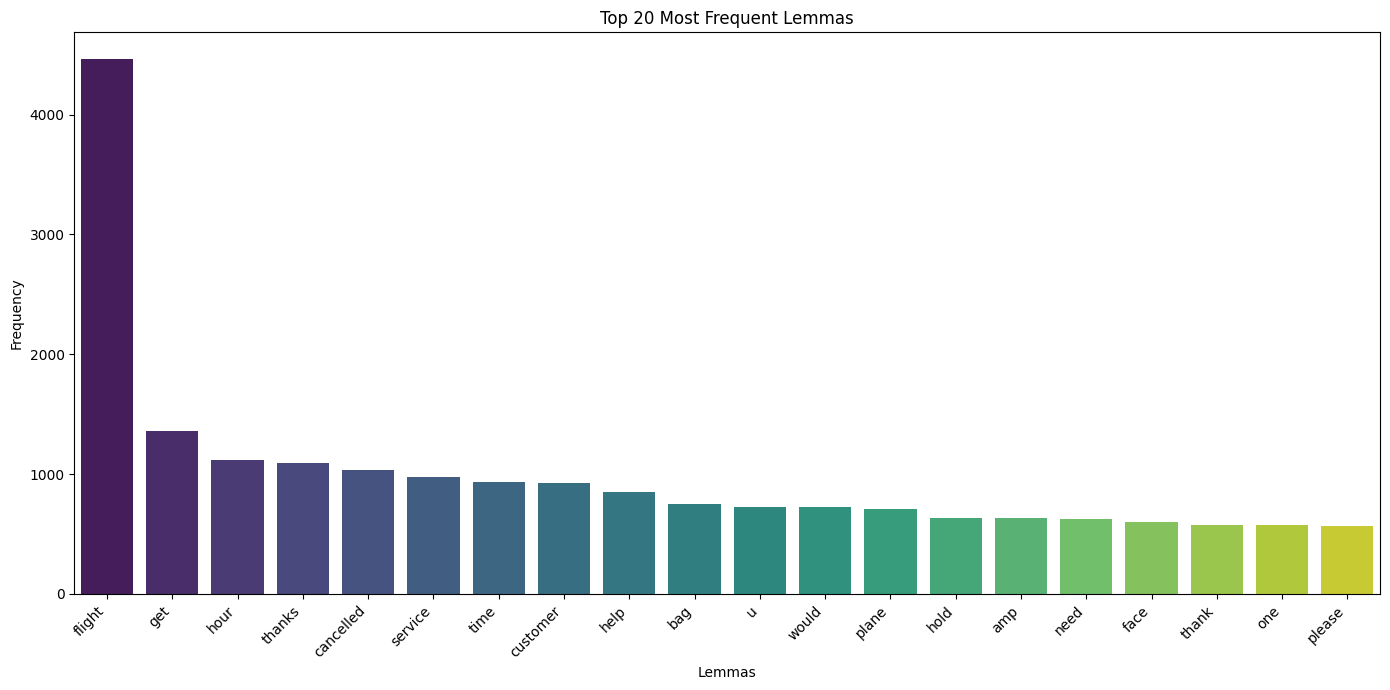

flight: 4463
get: 1362
hour: 1122
thanks: 1096
cancelled: 1034
service: 976
time: 933
customer: 922
help: 850
bag: 751
u: 724
would: 722
plane: 712
hold: 633
amp: 631
need: 627
face: 599
thank: 575
one: 574
please: 571


In [95]:
# getting Top 20 most frequent stems (bar chart) of the data['text']
all_lemmas = []
for lemma_list in data['text']:
    if isinstance(lemma_list, list):
        for lemma in lemma_list:
            if isinstance(lemma, str):
                lemma = lemma.lower()
                if lemma.isalpha():
                    all_lemmas.append(lemma)

lemma_counts = Counter(all_lemmas)
top_20_lemmas = lemma_counts.most_common(20)

lemmas_for_plot, frequencies = zip(*top_20_lemmas)

plt.figure(figsize=(14, 7))
sns.barplot(
    x=list(lemmas_for_plot),
    y=list(frequencies),
    hue=list(lemmas_for_plot),
    palette="viridis",
    legend=False
)
plt.xlabel("Lemmas")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Lemmas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

for lem, freq in top_20_lemmas:
    print(f"{lem}: {freq}")

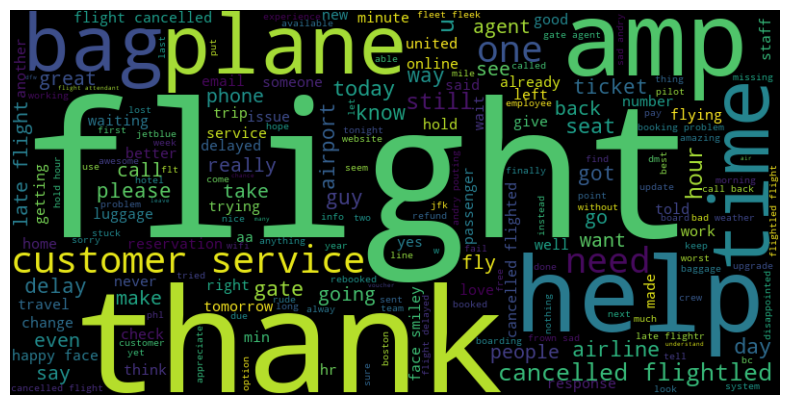

In [96]:
# displaying the word cloud of the words frequencies
all_lemmas_str = ' '.join(all_lemmas)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_lemmas_str)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()